In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Wykresy proste

- punktowy (scatter)
- liniowy
- belkowy (bar)
- text
- schodkowy, stem (łodygowy), wypełnienie


Wykresy proste nie stosują gramatyki grafiki, innych niż tworzenie skali. Poszczególne parametry wykresu definiowane są przez osobne zmienne, dane nie są przetwarzane w sposób niejawny. Wykresy proste są używane jako tworzywo do zaawansowanych wykresów. Wykresy są bardzo konfigurowanlne.


<div class="alert alert-block alert-success">
    <b>UWAGA:</b> Wykresy matplotlib posiadają opcjonalny paramter <b>data</b>, który pozwala parametry geometryczne np. x,y przekazywać jako <b>string</b>. W takiej stytuacji dane pobierane są z obiektu data jako data[s], o ile nie wywołuje to wyjątku</div>
    
<div class="alert alert-block alert-warning">
    <b>UWAGA:</b> Składnia poszczególnych typów wykresów jest skrajnie niespójna zarówno na poziomie nazw parametrów jak i samej filozofii tworzenia wykresów</div>
    

## Wykres punktowy

scatter

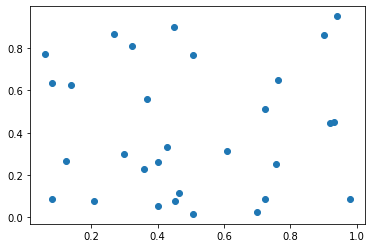

In [2]:
x = np.random.rand(30)
y = np.random.rand(30)
plt.scatter(x,y)

### Zmienne wizualne obsługiwane w wykresie scatter

#### Iterowalne
- rozmiar (s)
- kolor (wypełnienie i krawędzie)
#### Pojedyncze
- przeźroczystość
- marker 

Jeżeli chcemy wprowadzić kilka grup, każda z grup musi być dodawana do wykresu osobno.

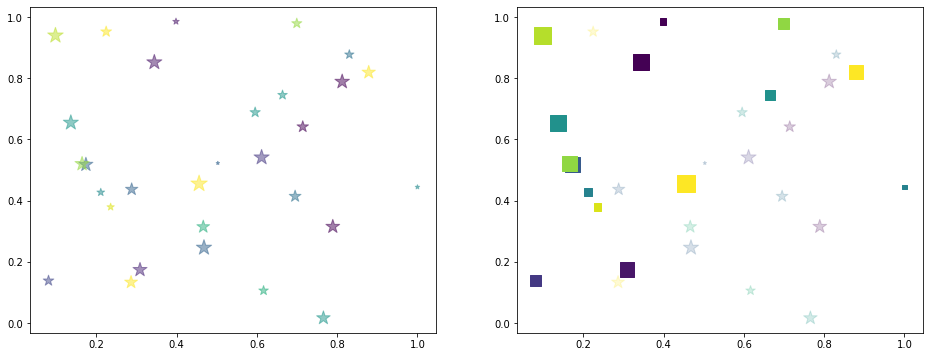

In [3]:
colors = np.random.randint(10,30,30)
sizes = np.random.rand(30)*300
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(16,6))
ax1.scatter(x,y,c=colors,s=sizes,alpha=0.5,marker="*")
ax2.scatter(x[:15],y[:15],c=colors[:15],s=sizes[:15],alpha=0.2,marker="*")
ax2.scatter(x[15:],y[15:],c=colors[15:],s=sizes[15:],alpha=1,marker="s")


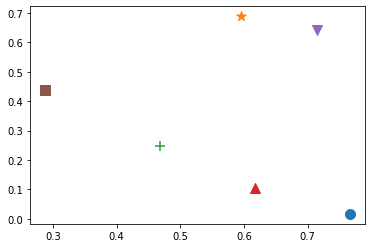

In [4]:
symbols = "o*+^vs"
fig,ax = plt.subplots()
for X,Y,m in zip(x,y,symbols): # zip skraca do najkrótszego wektora
    ax.scatter(X,Y,marker=m,s=100)

## Wykresy liniowe

Jednocześnie może być definiowana tylko jedna linia wykresu. Własności linii nie są własnością wykresu, ale obiektu geometrycznego Line2D. Dostęp do własności linii mamy poprzez `**kwargs`, które są przesyłane do własości obiektu Line2D. Wykres scatter to odmiana wykresu liniowego, gdzie wzór linii jest zdefiniowany jako '' a wyświetlane są punktu.

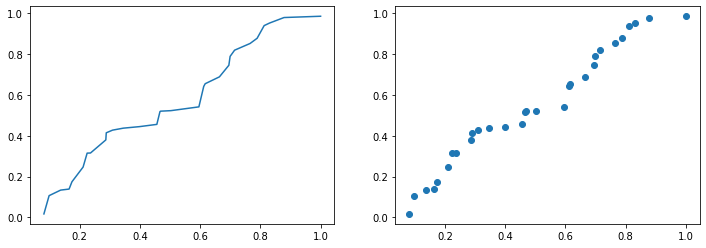

In [5]:
x = np.sort(x)
y = np.sort(y)
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,4))
ax1.plot(x,y)
ax2.plot(x,y,ls='',marker="o")

### Parametry linii

Jest ich kilkadziesiąt. Zą to własności obieku Line2D. https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot. Najważniejsze:

- styl  ls 
- marker
- kolor  c
- szerokość lw



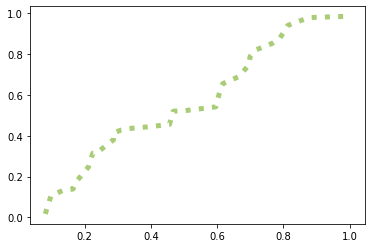

In [6]:
fig,ax = plt.subplots()
ax.plot(x,y,ls=':', c="#AACC77", lw=5)

### Wykres schodkowy

Odmiana wykresu liniowego. Ma własne API: **step()**, ale identyczny efekt można osiągnąć dodając parametr *sdrawstyle (ds)* do standardowego wykresu liniowego. parametr step pozwala sterować sposobem tworzenia stopni. Własności linii dziedziczone są po obiekcie Line2D. W tym wypełnienie

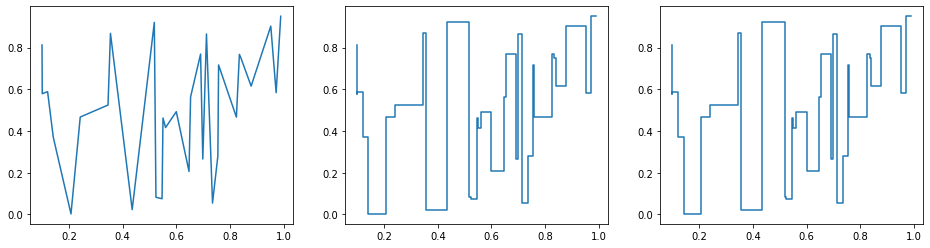

In [7]:
x = np.sort(np.random.rand(30))
y = np.random.rand(30)
fig,(ax1,ax2, ax3) = plt.subplots(ncols=3,figsize=(16,4))
ax1.plot(x,y)
ax2.plot(x,y,ds='steps')
ax3.step(x,y)

## Wykres słupkowy (bar)

Pozwala tworzyć wykres składający się z prostokątów (słupków), gdzie dane definiują położenie belki na osi X oraz wysokość (height). Nie można definiować bezpośrednio odstępu pomiędzy słupkami. Można to robić pośrednio definiując położenie belek.Zmienna X może być zarówno zarówno ciągła jak i dyskretna. Pozioma odmiana wykresu słupkowego tworzona jest poleceniem **barh()**.

<BarContainer object of 10 artists>

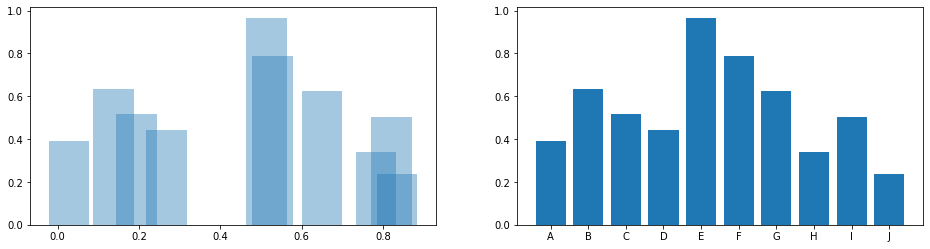

In [8]:
xs = np.sort(np.random.rand(10))
xd = [*"ABCDEFGHIJ"] #podział łańcucha znaków na poszczególne znaki, w praktyce rozpakowanie krotki
height = np.random.rand(10)
x = np.sort(np.random.rand(30))
y = np.random.rand(30)
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(16,4))
ax1.bar(xs,height,width=0.1,alpha=0.4)
ax2.bar(xd,height)

Opcjonalnie można również definiować szerokość (width), położenie dołu słupka (bottom).

<BarContainer object of 10 artists>

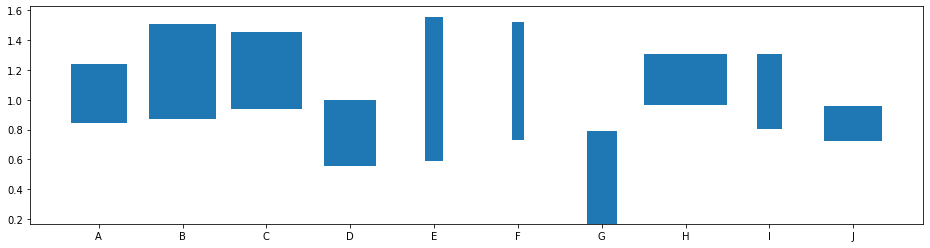

In [9]:
bottom = np.random.rand(10)
width = np.random.rand(10)
fig,(ax1) = plt.subplots(ncols=1,figsize=(16,4))
ax1.bar(xd,height,bottom=bottom,width=width)

### Parametry

Parametry poszczególnych belek ustawiane są globalnie i dziedziczą po obiekcie rectangle. Do obiektu rectangle przekazywane są przez `**kwargs`. Opis parametrów: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar.html. Podobnie jak w przypadku markerów można osobno definiować obrys i wypełnienie. Różne kolory można definiować w formie listy (jak dla punktów), pozostałe elementy można zmieniać iteracyjnie.
 

<BarContainer object of 3 artists>

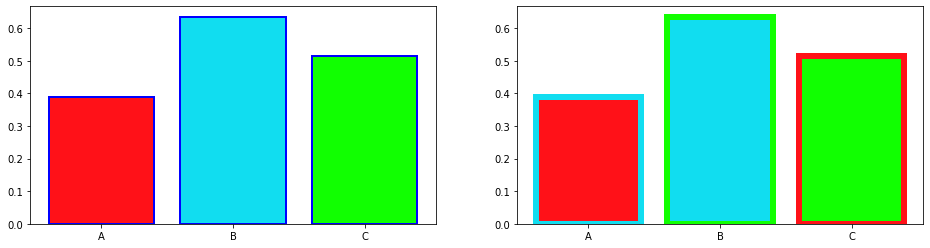

In [10]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(16,4))
ax1.bar(xd[:3],height[:3],color=['#FF1118',"#11DDF0","#11FF01"],linewidth="2",edgecolor="blue")
ax2.bar(xd[:3],height[:3],color=['#FF1118',"#11DDF0","#11FF01"],linewidth="6",edgecolor=["#11DDF0","#11FF01",'#FF1118'])

## Wykres łodygowy (stem)

Wykres przenoszący podobną informację jak wykres belkowy. Ograniczone zastosowanie. Nie rozwijany. Identyczny efekt można uzyskać przy pomocy wykresu punktowego. Posiada ograniczone formatowanie dla punktów i linii, jedynie starą metodą **pylab**

<StemContainer object of 3 artists>

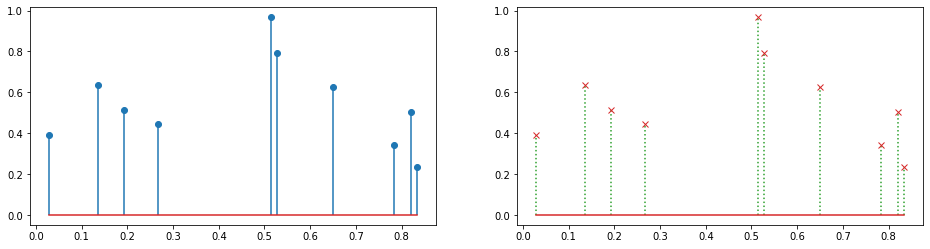

In [11]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(16,4))
ax1.stem(xs,height)
ax2.stem(xs,height,linefmt="C2:",markerfmt="C3x")

## Tekst jako wykres

Tekst jest używany jako uzupełnienie w wykresach złożonych, ale można wykorzystać jako symbole. Pojedynczy tekst może zostać dodany w pojedynczym kroku iteracji. Wymaga jednak wcześniejszego zainicjowania wykresu. Więcej pracy z tekstem w kolejnych częściach zajęć.

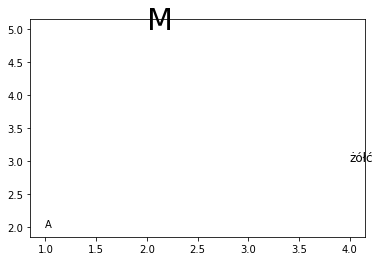

In [13]:
X = [1,2,4]
Y = [2,5,3]
text = ['A', 'M', 'żółć']
size = [10,30,12]

fig,ax = plt.subplots()
ax.scatter(X,Y,marker='')
for x,y,t,s in zip(X,Y,text,size):
    ax.text(x,y,t,size=s)


# Wykresy złożone

## Wypełnienie

Najczęściej stosowana w złożonych wykresach do ilustracji zakresów np. niepewności. W praktyce jest to obiekt poligonowy (PolyCollection) i tymj samym posiada rozbudowane formatowanie właściwości poprzez `**kwargs`. Parametry dotyczą zarówno obrysu jak i wypełnienia.

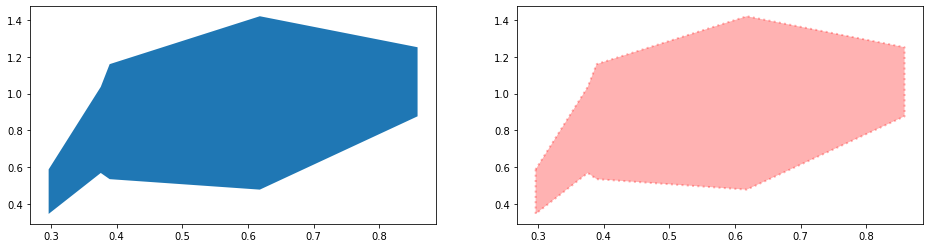

In [ ]:
x = np.sort(np.random.rand(5))
y1 = np.random.rand(5)
y2 = y1+0.2+np.random.rand(5)
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(16,4))
ax1.fill_between(x,y1,y2)
ax2.fill_between(x,y1,y2,ls=":",lw=2,alpha=0.3,color="r")

# Słupki błędów

Słupki błędów dostępne bezpośrednio są dla wykresu słupkowego, a także jako osobny typ errorbar, który można połączyć z dowolnym wykresem 2D. Jako samodzielny wykres przypominają wykresy liniowe i punktowe.

<ErrorbarContainer object of 3 artists>

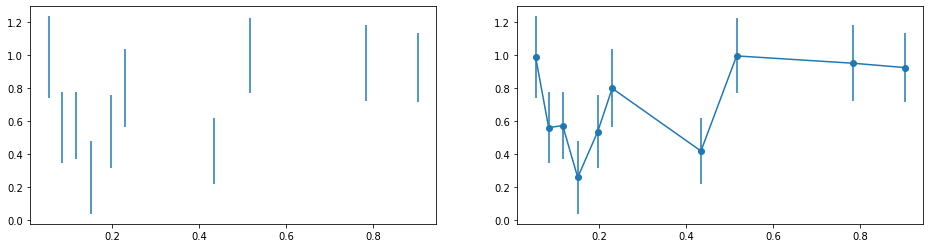

In [14]:
x = np.sort(np.random.rand(10))
y = np.random.rand(10)
err = np.random.rand(10)/20+0.2
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(16,4))
ax1.errorbar(x,y,err,fmt='none')
ax2.errorbar(x,y,err,marker="o")

## Połączenie słupków błędów z innymi typami wykresów

# Wizualizacja rozkładów zmiennych

Wykresy statystyczne nie są priorytetem w rozwoju biblioteki matplotlib, gdyż ta funkcjonalność została przejęta przez nakładki, mn. seaborn. Utrzymywana jest jedynie kompatybilność wsteczna. Wykresy statystyczne wymagają wewntrznej obróbki danych (realizowanej przez matplotlib), najcześciej przez funkcje statystyczne z bibioteki `scipy` i `statsmodels`

In [2]:
x = np.random.standard_normal(1000)+np.random.rand(1000)/3
y = (np.random.standard_normal(1000)*2-1)+(np.random.rand(1000)+1)/3



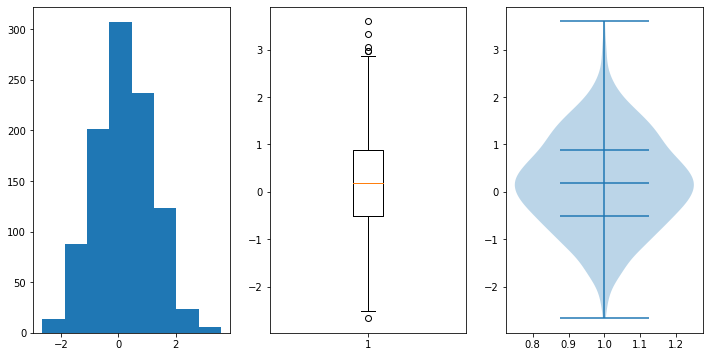

In [44]:
fig, axes = plt.subplots(ncols=3,figsize=(12,6))
axes[0].hist(x,bins=8)
_ = axes[1].boxplot(x)
_ = axes[2].violinplot(x,showmedians=True,quantiles=[0.25,0.75],points=200)

## Empiryczna funkacja rozkładu

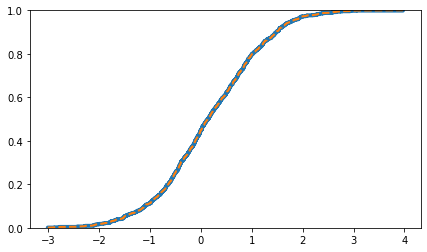

In [8]:
fig, ax = plt.subplots(figsize=(7,4))
ax.ecdf(x,lw=4) # linia grubości 4

def ecdf(x):
    xs = np.sort(x)
    ys = np.arange(1, len(xs)+1)/float(len(xs))
    return xs, ys

ax.plot(*ecdf(x),ls="--",lw=2) # linia grubości 2, przerywana i pomarańczowa. * operator rozwinięcia krotki, zwracanej przez funkcję ECDF

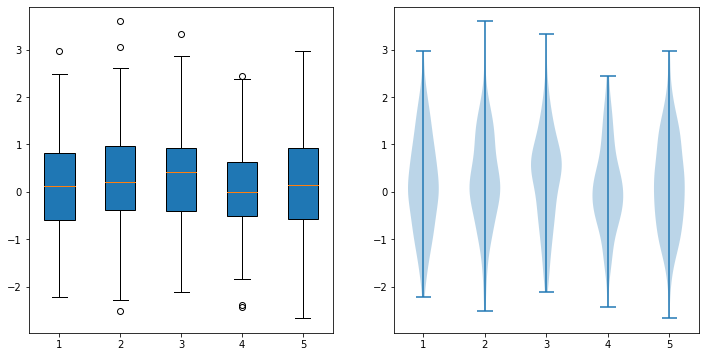

In [45]:
categories = np.random.randint(0,5,1000)
sorted = [x[categories==i] for i in range(5)] # sortujemy na podstawie kategorii
fig, axes = plt.subplots(ncols=2,figsize=(12,6))
_ = axes[0].boxplot(sorted,patch_artist=True)
_ = axes[1].violinplot(sorted)

# Wizualizacja regularnych struktur 3D i 4D

- siatki (arrays) reprezentują wartości Z dla siatki XY. Topologia siatki jest definiowana przez wektory wartości. Długość wektora musi być o 1 większa niż siatka
- Obraz wyświetla wartości siatki 2D rozłożonej regularnie (macierzy). Wymiary macierzy definiują topologię siatki
- Wykresy konturowe to macierze wyświetlane w formie dyskretnej 

Siatki mogą być wykorzystywane do prezentacji pól skalarnych, gdzie wartość punktu pola reprezentowana jest przez wartość Z

Każda z form wyświetlania danych ma liczne parametry, które będą omówione osobno

<div class="alert alert-block alert-warning">
    <b>UWAGA:</b> Od wersji 3.5 matplotlib siatki nie wymagają zastosowania np.meshgird(), wystarczą wektory marignalne</div>

## Siatki

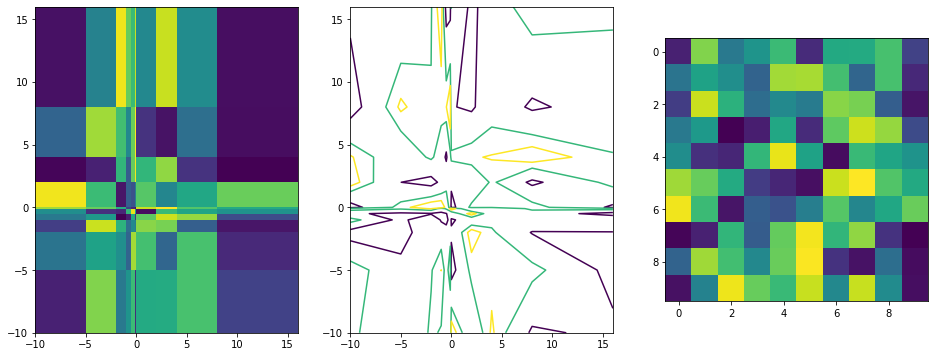

In [15]:
x = [-10,-5,-2,-1,-0.5,-0.1,0,2,4,8,16]
y = [-10,-5,-2,-1,-0.5,-0.1,0,2,4,8,16]
Z =np.random.rand(100)
Z.shape=(10,10)
Zo = np.random.rand(121)
Zo.shape = (11,11) # inne rozmiary dla contour i pcolormesh

fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(16,6))
ax1.pcolormesh(x,y,Z)
ax2.contour(x,y,Zo,levels=[0.2,0.6,0.8])
ax3.imshow(Z) #Odwrócony Y macierzy


## Chmury punktów

Służą do prezentacji nieregularnych chmur punktów reprezentujących dyskretne stany zjawisk ciągłych

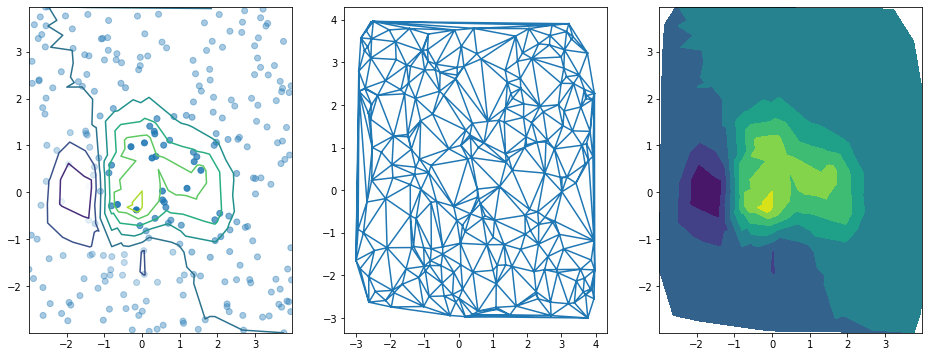

In [16]:
x = np.random.uniform(-3, 4, 256)
y = np.random.uniform(-3, 4, 256)
#Z =np.random.rand(100)
Z = (1 - x/2 + x**5 + y**3) * np.exp(-x**2 - y**2)
levels = np.linspace(Z.min(), Z.max(), 6)


scaleZ=(Z-Z.min())/(Z.max()-Z.min()) # skalowanie 0 .. 1
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(16,6))
ax1.scatter(x, y, alpha=scaleZ)
ax1.tricontour(x, y, Z)
ax2.triplot(x, y)
ax3.tricontourf(x, y, Z)


## Pola wektorowe

Przedstawiają to zjawiska, gdzie każdemu punktowi przypisano jakiś wektor, tj siłę oddziaływania i kierunek. Pole wektorowe opisywane jest 4 zmiennymi, gdzie zmienna Z z pola skalarnego jest zastąpiona wspórzędnymi U i V

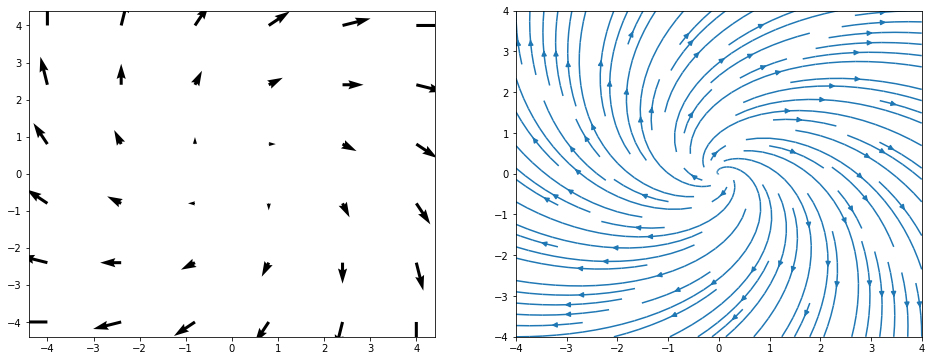

In [17]:
x = np.linspace(-4, 4, 6)
y = np.linspace(-4, 4, 6)
X, Y = np.meshgrid(x, y)
U = X + Y
V = Y - X
# plot
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(16,6))
ax1.quiver(X, Y, U, V)
ax2.streamplot(X, Y, U, V)

# Wykresy kołowe


<div class="alert alert-block alert-warning">
    <b>UWAGA:</b>Z punktu widzenia <i>grammar of graphics</i> to tylko transformacja barplot do układu polarnego</div>


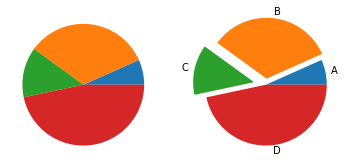

In [11]:
y=[1,5,2,7]
fig,axes = plt.subplots(ncols=2)
_ = axes[0].pie(y, radius=1) # z punktu widzenia GG to tylko transformacja barplot do układu polarnegp
_ = axes[1].pie(y, radius=1,explode=[0,0.1,0.2,0],labels=[*"ABCD"]) # z punktu widzenia GG to tylko transformacja barplot do układu polarnegp
